In [22]:
!git clone https://github.com/BachNgoH/AIO_Data_Analyst.git

Cloning into 'AIO_Data_Analyst'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 269 (delta 99), reused 229 (delta 60), pack-reused 0
Receiving objects: 100% (269/269), 2.40 MiB | 17.93 MiB/s, done.
Resolving deltas: 100% (99/99), done.


# **EDA with LLM**

In [1]:
%cd AIO_Data_Analyst/

/content/AIO_Data_Analyst


In [24]:
!git pull -ff

Already up to date.


In [25]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%%writefile .env
GOOGLE_API_KEY="YOUR_API_KEY"

Writing .env


In [3]:
!chainlit run app.py &>/content/logs.txt &


In [7]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.86.168.125


In [8]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/AIO_Data_Analyst/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/AIO_Data_Analyst/package.json'
npm WARN AIO_Data_Analyst No description
npm WARN AIO_Data_Analyst No repository field.
npm WARN AIO_Data_Analyst No README data
npm WARN AIO_Data_Analyst No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.468s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!npx localtunnel --port 8000

npx: installed 22 in 2.207s
your url is: https://cool-rockets-type.loca.lt
^C


# **Hands on coding**

In [1]:
import pandas as pd
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

Read data

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1zO7duTxfDEpt3Sox4N6lfc0VMTnMgECK/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1zO7duTxfDEpt3Sox4N6lfc0VMTnMgECK
To: /content/data.csv
100% 562k/562k [00:00<00:00, 52.8MB/s]


In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

EDA

In [7]:
# Since this is not necessary

df = df.drop(['customer_id'], axis=1)

In [8]:
df.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


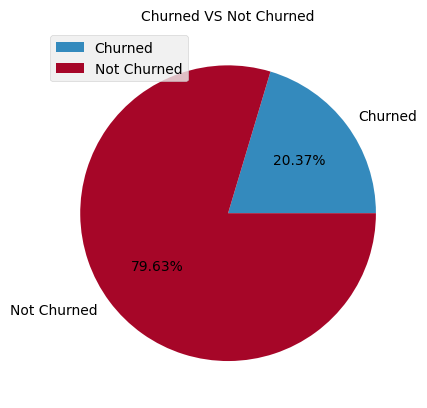

In [9]:
# Get percentage of each class in target column (churn column)

sizes = [df.churn[df['churn'] == 1].count(), df.churn[df['churn'] == 0].count()]
labels = ['Churned', 'Not Churned']
plt.pie(sizes, labels=labels, autopct = '%.2f%%')
plt.legend(loc='upper left')
plt.title("Churned VS Not Churned", size = 10)
plt.show()

<Axes: title={'center': 'credit_score'}, ylabel='Frequency'>

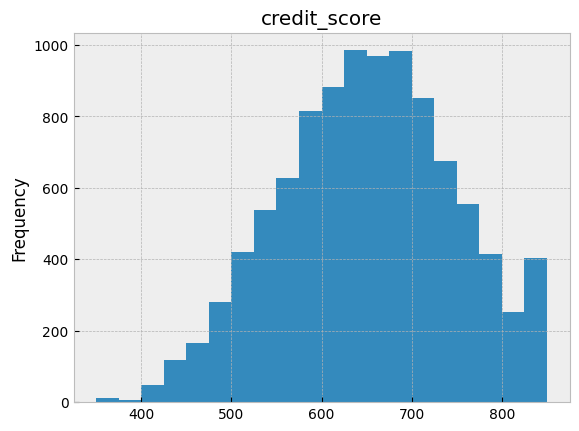

In [10]:
# Plot credit score
df['credit_score'].plot(kind='hist', bins=20, title='credit_score')

In [11]:
# Get unique value of this column
countries = list(df['country'].unique())

countries

['France', 'Spain', 'Germany']

In [12]:
# Number of rows each country
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

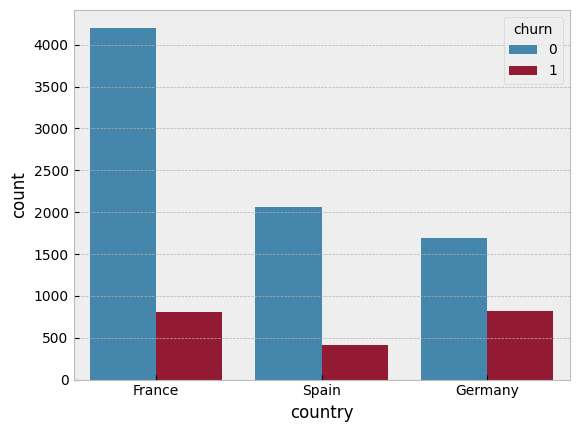

In [14]:
# Plot each country number of rows churn=1 and churn=0
sns.countplot(x='country', hue='churn', data=df)

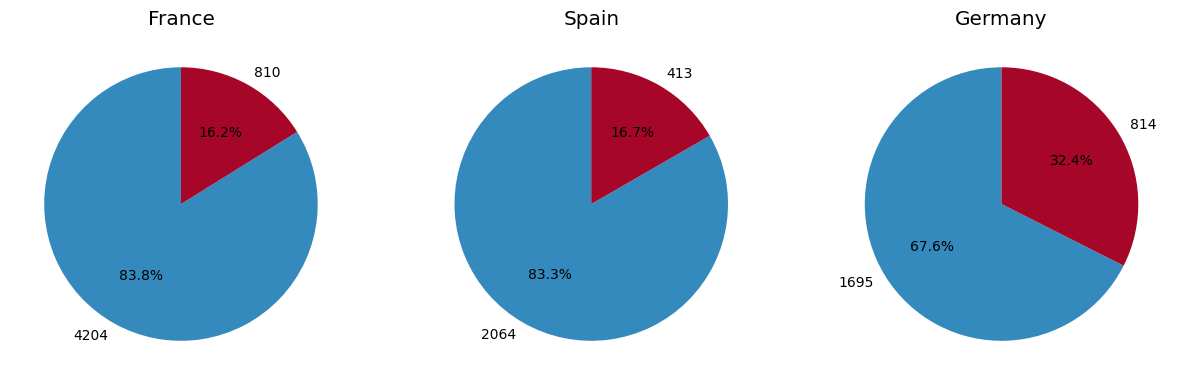

In [21]:
# Distribution of each country about the churn

fig, axes = plt.subplots(1, len(countries), figsize=(15, 5))

for ax, country in zip(axes, countries):
    # Filter the dataframe by country
    country_data = df[df['country'] == country]

    # Count the churn values
    churn_counts = country_data['churn'].value_counts()

    # Plot the pie chart
    ax.pie(churn_counts, labels=churn_counts, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{country}')

plt.show()

<Axes: xlabel='age', ylabel='Count'>

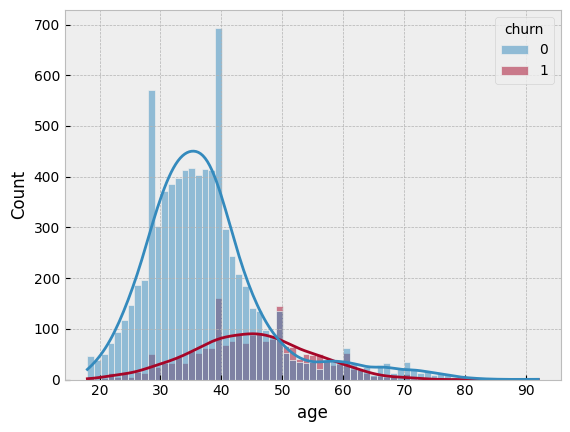

In [22]:
sns.histplot(data=df, x='age', hue="churn", kde=True)

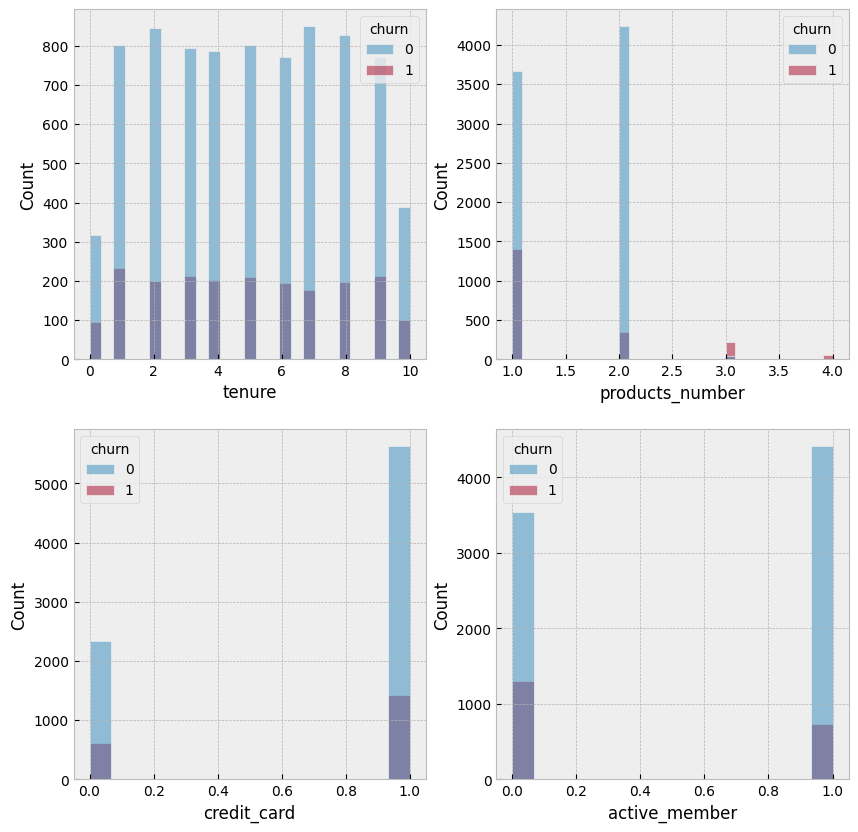

In [17]:
# "tenure", "products_number", "credit_card", "active_member"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flat

columns = ["tenure", "products_number", "credit_card", "active_member"]

for i in range(len(columns)):
    sns.histplot(data=df, x=columns[i], hue="churn", ax=axs[i])

From this plot, we can see that:

1. **tenure**
  - The distribution of churn does not vary significantly across different tenure values.
2. **products_number**
  - In this dataset, most customers have either one or two products.
  - There is a trend indicating that customers with one product have a higher churn rate than those with two products.
  - Customers who have more than two products tend to have a higher churn rate.
3. **credit_card**
  - Customers without a credit card have a slightly higher churn rate compared to those with a credit card.
4. **active_member**
  - Non_active member exhibit a significantly higher churn rate compared to active members.

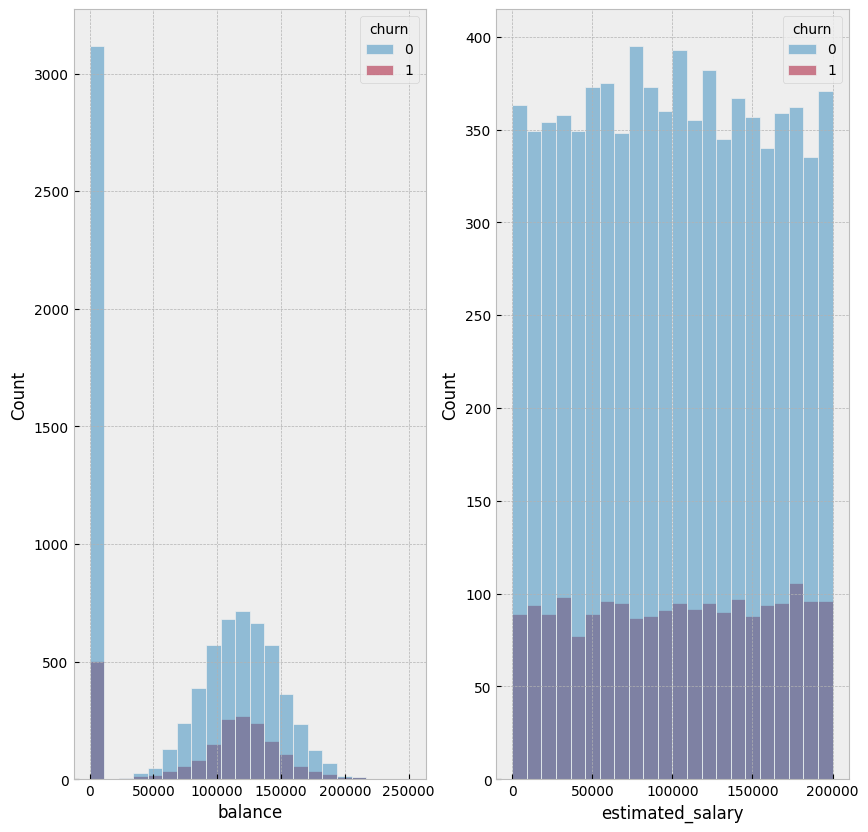

In [18]:
# "balance", "estimated_salary"

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs = axs.flat

columns = ["balance", "estimated_salary"]

for i in range(len(columns)):
    sns.histplot(data=df, x=columns[i], hue="churn", ax=axs[i])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Convert column with value type: string to int

df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

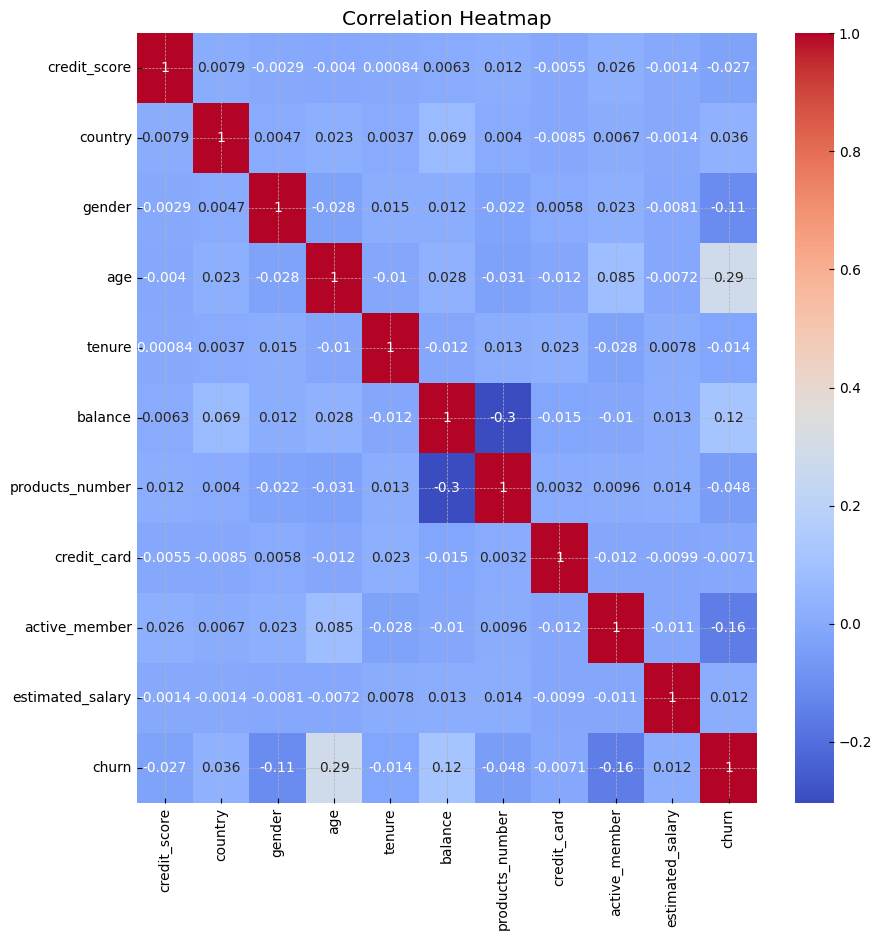

In [21]:
# Plot heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()